In [1]:
"""
================================================
Coding - Decoding simulation of a random message
================================================
This example shows a simulation of the transmission of a binary message
through a gaussian white noise channel with an LDPC coding and decoding system.
"""


import numpy as np
from pyldpc import make_ldpc, decode, get_message, encode
from matplotlib import pyplot as plt
import random 
import time


def LDPC(n,d_v,d_c,nb_error,maxiter):
    #n = 1000
    #d_v = 20
    #d_c = 25
    seed = np.random.RandomState(802)
    ##################################################################
    # First we create an LDPC code i.e a pair of decoding and coding matrices
    # H and G. H is a regular parity-check matrix with d_v ones per row
    # and d_c ones per column

    H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

    n, k = G.shape
    print("Number of coded bits:", k)
    print("taille de H =", H.shape, "et taille de G = ", G.shape)


    #print("\n")


    ##### défini et encode message ####

    caract_message = [0,1]
    message = []
    for i in range(k):
        message.append(random.choice(caract_message))

    #message = np.array([1,1,0,1,0,0,1,0,1,1,1])
    message = np.array(message)
    c = np.dot(message.T,G.T)%(-2)
    #print("c = ",c)
    len(c)

    c2 = c
    for i in range(len(c)):
        if c[i] == 0:
            c2[i] = 1

    #print("c2 = ",c2)

    #snr = np.zeros((30,1))
    #snr

    c3 = [k + round(np.random.normal(0, 0.2),2) for k in c2]
    #print("c3 = ",c3)


    #print("\n")


    ###### Crée du bruit et erreur "#######"

    def check_nb_err(message_vrai,message_decode):
        nb_faute = 0
        for i in range(len(message_vrai)):
            if message_decode[i] == message_vrai[i] :
                nb_faute += 0
            else:
                nb_faute += 1
        return nb_faute

    def val_abs(message):
        message_corrige = []
        for i in range(len(message)):
            if message[i] >= 0:
                message_corrige.append(1)
            else:
                message_corrige.append(-1)
        return message_corrige

    c3_abs = val_abs(c3)
    #print("c3_abs = ", c3_abs)

    check_nb_err(c2,c3_abs)

    def add_error(message):
        list_bit = [i for i in range(len(message))]
        for i in range(nb_error): # change de bit 1 seul sign
            stop = 0
            bit_faux = random.choice(list_bit)
            #print(" bit_faux = ", bit_faux)
            while abs(message[bit_faux]) >= 1 and stop < len(message) : #to be sure to change the sign
                stop += 1
                bit_faux = random.choice(list_bit)
            
            if message[bit_faux] <= 0:
                message[bit_faux] += 1
            else: 
                message[bit_faux] -= 1
            list_bit.remove(bit_faux)
            #del(list_bit[bit_faux])
            #list_bit = [i for i in range(len(list_bit))]
        return message

    c_err = add_error(c3)
    #check_nb_err(c2,val_abs(c_err))
    #print("c_err = ", c_err)
    nb_err_init = check_nb_err(c2,val_abs(c_err))
    print(" initialement, il y a = ",nb_err_init," nombre d'erreurs")



    #print("\n")
    #print("\n")


    ######## Correction #######

    y = encode(G,message,9999)
    #print("y = ",y)


    D = decode(H, np.array(c_err),9999,maxiter)
    #print("D = ",D)
    len(D)

    x = get_message(G, D)

    #print("x = ",x)
    nb_err_end = check_nb_err(message,x)
    print(" après correction, il y a = ", nb_err_end ," nombre d'erreurs")
    return nb_err_init, nb_err_end,
    




In [2]:
nb_err_ini = []
nb_err_end_rate = [] 
nb_err_end = [] 
time_spent = []

for i in range(100):
    #print("\n")
    print("iteration :",i)
    tic = time.time()
    x1,x2 = LDPC(1000,40,50,i,5)
    tac = time.time()
    
    if i <= x1:
        nb_err_ini.append(int(x1))
        if i != 0 and x2 < i :
            nb_err_end_rate.append(round((int(x1)-int(x2))/int(x1),2)*100)
        if i == 0:
            nb_err_end_rate.append(100)
        if x2 >= i and i !=0 :
            nb_err_end_rate.append(0)
        time_spent.append(round(tac-tic,2))
        nb_err_end.append(x2)
    print("temps exécution = ",tac - tic, "s")
    #print(f'Temps d\'exécution : {elapsed:.2}ms')
    print("\n")

iteration : 0
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  0  nombre d'erreurs


C:\Users\yanna\anaconda3\lib\site-packages\pyldpc\decoder.py:48: RuntimeWarning: divide by zero encountered in true_divide
  Lc = 2 * y / var


 après correction, il y a =  0  nombre d'erreurs
temps exécution =  3.6878299713134766 s


iteration : 1
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  1  nombre d'erreurs


C:\Users\yanna\anaconda3\lib\site-packages\pyldpc\decoder.py:62: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  warnings.warn("""Decoding stopped before convergence. You may want


 après correction, il y a =  0  nombre d'erreurs
temps exécution =  3.458766222000122 s


iteration : 2
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  2  nombre d'erreurs
 après correction, il y a =  0  nombre d'erreurs
temps exécution =  3.2997119426727295 s


iteration : 3
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  3  nombre d'erreurs
 après correction, il y a =  2  nombre d'erreurs
temps exécution =  3.874037742614746 s


iteration : 4
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  4  nombre d'erreurs
 après correction, il y a =  2  nombre d'erreurs
temps exécution =  4.09915828704834 s


iteration : 5
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  5  nombre d'erreurs
 après correction, il y a =  2  nombre d'erreurs
temps exécution =  4.272865

Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  37  nombre d'erreurs
 après correction, il y a =  9  nombre d'erreurs
temps exécution =  4.277020454406738 s


iteration : 38
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  38  nombre d'erreurs
 après correction, il y a =  11  nombre d'erreurs
temps exécution =  3.636583089828491 s


iteration : 39
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  39  nombre d'erreurs
 après correction, il y a =  10  nombre d'erreurs
temps exécution =  3.3605120182037354 s


iteration : 40
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  40  nombre d'erreurs
 après correction, il y a =  10  nombre d'erreurs
temps exécution =  3.466907501220703 s


iteration : 41
Number of coded bits: 239
taille de H = (800, 1000) et taille de

Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  72  nombre d'erreurs
 après correction, il y a =  16  nombre d'erreurs
temps exécution =  4.2058165073394775 s


iteration : 73
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  73  nombre d'erreurs
 après correction, il y a =  12  nombre d'erreurs
temps exécution =  3.6698286533355713 s


iteration : 74
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  74  nombre d'erreurs
 après correction, il y a =  11  nombre d'erreurs
temps exécution =  3.5243685245513916 s


iteration : 75
Number of coded bits: 239
taille de H = (800, 1000) et taille de G =  (1000, 239)
 initialement, il y a =  75  nombre d'erreurs
 après correction, il y a =  19  nombre d'erreurs
temps exécution =  3.7466859817504883 s


iteration : 76
Number of coded bits: 239
taille de H = (800, 1000) et taill

In [3]:
#plot le taux d'erreur binaire entrée sortie (nb_erreur entre-nb_erreur sorti/nb_erreur entrée) en fonction de longueur message
#ou plot moyenne pour un meme message et != nb erreur
#ou plot en fonction du temps ou ...

print(nb_err_ini)
print(nb_err_end_rate) 
print(nb_err_end) 
print(time_spent)

len(nb_err_end_rate)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 100.0, 100.0, 33.0, 50.0, 60.0, 50.0, 71.0, 62.0, 67.0, 40.0, 91.0, 83.0, 85.0, 71.0, 73.0, 62.0, 82.0, 83.0, 89.0, 85.0, 76.0, 82.0, 70.0, 75.0, 84.0, 73.0, 74.0, 56.99999999999999, 76.0, 83.0, 81.0, 91.0, 70.0, 76.0, 77.0, 75.0, 76.0, 71.0, 74.0, 75.0, 78.0, 88.0, 63.0, 70.0, 78.0, 87.0, 66.0, 83.0, 76.0, 70.0, 78.0, 83.0, 77.0, 74.0, 76.0, 73.0, 67.0, 79.0, 78.0, 77.0, 74.0, 81.0, 71.0, 77.0, 74.0, 79.0, 79.0, 81.0, 77.0, 59.0, 73.0, 78.0, 84.0, 85.0, 75.0, 75.0, 75.0, 77.0, 75.0, 72.0, 70.0, 76.0, 70.0, 76.0, 73.0, 83.0, 78.0, 74.0, 76.0, 72.0, 71.0, 78.0, 68.0, 78.0, 68.0, 76.0, 79.0, 78.0, 

100

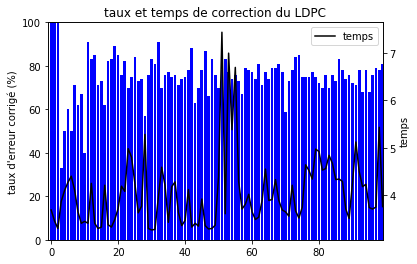

In [4]:


fig, ax1 = plt.subplots()
x = nb_err_ini
ax2 = ax1.twinx()
ax2.plot(x,time_spent, color='k',label="temps")
ax1.axis([-1,max(nb_err_ini),0,100])

plt.grid(False)
ax2.set_ylabel('temps', color='k')
ax1.set_ylabel("taux d'erreur corrigé (%)", color='k')
ax1.bar(x,nb_err_end_rate, color='b',label = "test 2")
plt.xlabel("nombre d'erreur en entrée")
plt.title("taux et temps de correction du LDPC")

plt.legend()

ax1.grid(False)
plt.grid(False)
plt.show()

In [5]:
np.mean(time_spent)

4.0531

In [6]:
np.mean(nb_err_end_rate)

75.2

In [7]:
min(nb_err_end_rate)

33.0

In [8]:
###### Crée du bruit et erreur "#######"

message = [k + round(np.random.normal(0, 0.2),2) for k in message]
    #print("c3 = ",c3)


    #print("\n")


    

    def check_nb_err(message_vrai,message_decode):
        nb_faute = 0
        for i in range(len(message_vrai)):
            if message_decode[i] == message_vrai[i] :
                nb_faute += 0
            else:
                nb_faute += 1
        return nb_faute

    def val_abs(message):
        message_corrige = []
        for i in range(len(message)):
            if message[i] >= 0:
                message_corrige.append(1)
            else:
                message_corrige.append(-1)
        return message_corrige

    c_abs = val_abs(message)


    def add_error(message,nb_error):
        list_bit = [i for i in range(len(message))]
        for i in range(nb_error): # change de bit 1 seul sign
            stop = 0
            bit_faux = random.choice(list_bit)
            #print(" bit_faux = ", bit_faux)
            while abs(message[bit_faux]) >= 1 and stop < len(message) : #to be sure to change the sign
                stop += 1
                bit_faux = random.choice(list_bit)
            
            if message[bit_faux] <= 0:
                message[bit_faux] += 1
            else: 
                message[bit_faux] -= 1
            list_bit.remove(bit_faux)
            #del(list_bit[bit_faux])
            #list_bit = [i for i in range(len(list_bit))]
        return message

    c_err = add_error(message,5)
    #check_nb_err(c2,val_abs(c_err))
    #print("c_err = ", c_err)
    nb_err_init = check_nb_err(message_ini,val_abs(c_err))
    print(" initialement, il y a = ",nb_err_init," nombre d'erreurs")
    
    
    
    

nb_err_ini = []
nb_err_end_rate = [] 
nb_err_end = [] 
time_spent = []

for i in range(50):
    #print("\n")
    print("iteration :",i)
    tic = time.time()
    x1,x2 = LDPC(1000,40,50,i,11)
    tac = time.time()
    
    if i <= x1:
        nb_err_ini.append(int(x1))
        if i != 0 and x2 < i :
            nb_err_end_rate.append(round((int(x1)-int(x2))/int(x1),2)*100)
        if i == 0:
            nb_err_end_rate.append(100)
        if x2 >= i and i !=0 :
            nb_err_end_rate.append(0)
        time_spent.append(round(tac-tic,2))
        nb_err_end.append(x2)
    print("temps exécution = ",tac - tic, "s")
    #print(f'Temps d\'exécution : {elapsed:.2}ms')
    print("\n")
    
    
    
fig, ax1 = plt.subplots()
x = nb_err_ini
ax2 = ax1.twinx()
ax2.plot(x,time_spent, color='k',label="temps")
ax1.axis([-1,max(nb_err_ini),0,100])

plt.grid(False)
ax2.set_ylabel('temps', color='k')
ax1.set_ylabel("taux d'erreur corrigé (%)", color='k')
ax1.bar(x,nb_err_end_rate, color='b',label = "test 2")
plt.xlabel("nombre d'erreur en entrée")
plt.title("taux et temps de correction du LDPC")

plt.legend()

plt.grid(False)
plt.show()

IndentationError: unexpected indent (1168205030.py, line 12)